# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Insurance data.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1
0,Age,Insurance
1,12,0
2,15,0
3,16,0
4,24,0


In [3]:
df.columns=df.iloc[0]

.iloc[0]
* sets the column headers of a Pandas DataFrame (df) to the values of the first row (df.iloc[0]).

In [4]:
df.drop(0,axis=0,inplace=True)

df.drop(0, axis=0, inplace=True) 
* removes the row with index 0 from the DataFrame df

In [5]:
df.head()

,Age,Insurance
1,12,0
2,15,0
3,16,0
4,24,0
5,25,0


In [6]:
df["Age"].value_counts()

Age
67    2
12    1
15    1
16    1
25    1
24    1
30    1
35    1
41    1
26    1
44    1
48    1
54    1
53    1
59    1
64    1
68    1
70    1
Name: count, dtype: int64

* Plots data points where Insurance == 0, using Age on the x-axis and Insurance (always 0) on the y-axis.

* Plots data points where Insurance == 1, using Age on the x-axis and Insurance (always 1) on the y-axis.

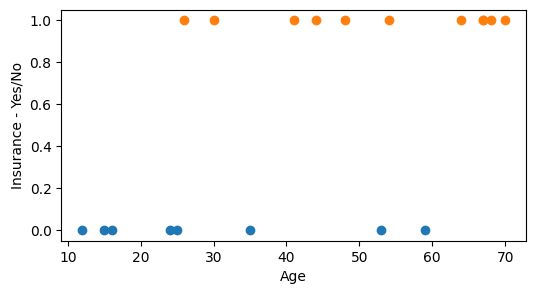

In [7]:
plt.figure(figsize=(6,3))
plt.scatter(df[df["Insurance"]==0]["Age"],df[df["Insurance"]==0]["Insurance"])
plt.scatter(df[df["Insurance"]==1]["Age"],df[df["Insurance"]==1]["Insurance"])
plt.xlabel("Age")
plt.ylabel("Insurance - Yes/No")
plt.show()

In [8]:
df["Age"]=df["Age"].astype("int")

In [9]:
df["Insurance"]=df["Insurance"].astype("int")

In [10]:
x = df.drop("Insurance",axis=1)
y = df["Insurance"]

In [11]:
x

,Age
1,12
2,15
3,16
4,24
5,25
6,26
7,30
8,35
9,41
10,44


In [12]:
y

1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     1
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    1
Name: Insurance, dtype: int64

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x,y)

LogisticRegression()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        19 non-null     int64
 1   Insurance  19 non-null     int64
dtypes: int64(2)
memory usage: 436.0 bytes


In [16]:
model.predict([[45]])

array([1])

* model.predict ( [ [ 45 ] ] )  is used to predict the output for a single input value ( 45 )

In [17]:
model.predict([[31]])

array([0])

In [18]:
model.predict([[40]])

array([1])

In [19]:
model.predict([[68],[26],[42],[38]])

array([1, 0, 1, 1])

In [20]:
model.predict_proba([[45]])

array([[0.35137202, 0.64862798]])

* 0.35137202: Probability that the input belongs to Class 0.
* 0.64862798: Probability that the input belongs to Class 1.

In [21]:
model.predict_proba([[31]])

array([[0.61165401, 0.38834599]])

In [22]:
model.predict_proba([[40]])

array([[0.44229799, 0.55770201]])

In [23]:
model.predict_proba([[68],[26],[42],[38]])

array([[0.08577033, 0.91422967],
       [0.69750457, 0.30249543],
       [0.40508778, 0.59491222],
       [0.48016745, 0.51983255]])

In [24]:
m = model.coef_

In [25]:
c = model.intercept_

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-((m*x )+ c)))

In [27]:
sigmoid(40)

array([[0.55770201]])

In [28]:
sigmoid(39)

array([[0.53882329]])

In [29]:
all_sigmoid_values = list(map(lambda x: sigmoid(x)[0][0],x["Age"]))

The provided line of code seems to be trying to calculate the sigmoid values for the "Age" column of a dataset (x["Age"]) and store these values in the list all_sigmoid_values. 

Code Explanation
* Input Data :
    * x [ "Age" ] : Assumes x is a DataFrame or dictionary-like object with an "Age" key or column.

* Sigmoid Function Application :
    * sigmoid ( x ) : Applies the previously defined sigmoid function, which likely returns a numpy array.

* Mapping Over Age :
    * map ( lambda x : sigmoid ( x ) [ 0 ] [ 0 ] , x [ "Age" ] ) :
        * For each value in x [ "Age" ] , the sigmoid ( ) function is applied.
        * Assumes sigmoid ( x ) returns a 2D array ( hence [ 0 ] [ 0 ] to extract a scalar ).

* Collecting Results :
    * The results from map are converted into a list using list ( map (...) ).

In [30]:
all_sigmoid_values

[np.float64(0.12980016727106983),
 np.float64(0.1578885322263251),
 np.float64(0.16829092445892474),
 np.float64(0.2713246865605411),
 np.float64(0.2866566966325438),
 np.float64(0.3024954263886636),
 np.float64(0.3703991909482939),
 np.float64(0.4627362597090256),
 np.float64(0.576415448446705),
 np.float64(0.6310628620121136),
 np.float64(0.6988268091399918),
 np.float64(0.7725717831566261),
 np.float64(0.7856876568056269),
 np.float64(0.8429439399607027),
 np.float64(0.8871015233649074),
 np.float64(0.9080599896749828),
 np.float64(0.9080599896749828),
 np.float64(0.9142296720768734),
 np.float64(0.9254546750652103)]

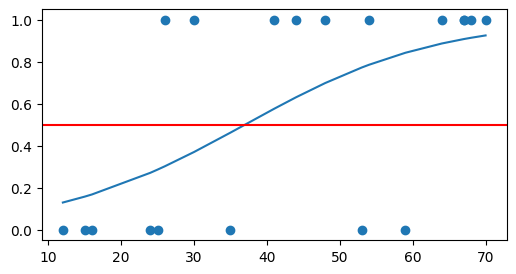

In [31]:
plt.figure(figsize=(6,3))
plt.scatter(df["Age"],df["Insurance"])
plt.plot(df["Age"],all_sigmoid_values) 
plt.axhline(0.5,color="red")
plt.show()           

In [32]:
df.head()

,Age,Insurance
1,12,0
2,15,0
3,16,0
4,24,0
5,25,0
